In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as py

In [6]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [7]:
fashion_data = keras.datasets.fashion_mnist.load_data()

In [8]:
fashion_data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [9]:
(x_train_sp,y_train_sp),(x_test_sp,y_test_sp) = fashion_data
x_train_sp.shape

(60000, 28, 28)

In [10]:
item_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
item_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
#Reshaping data
x_train_sp=x_train_sp.reshape((60000, 28, 28,1))
x_test_sp=x_test_sp.reshape((10000, 28, 28,1))
x_train_sp.shape

(60000, 28, 28, 1)

In [12]:
#Normailizing Data
x_train_norm=x_train_sp/255
x_test_norm=x_test_sp/255

In [13]:
x_validate,x_train=x_train_norm[:5000],x_train_norm[5000:]
y_validate,y_train=y_train_sp[:5000],y_train_sp[5000:]
x_test=x_test_norm

In [14]:
#Random seed
tf.random.set_seed(42)

#model architecture
model=keras.models.Sequential()

#building model
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

Epoch 1/5
860/860 [==============================] - 9s 8ms/step - loss: 0.8597 - accuracy: 0.7085 - val_loss: 0.7589 - val_accuracy: 0.7308
Epoch 2/5
860/860 [==============================] - 6s 7ms/step - loss: 0.5379 - accuracy: 0.8058 - val_loss: 0.4899 - val_accuracy: 0.8156
Epoch 3/5
860/860 [==============================] - 7s 8ms/step - loss: 0.4803 - accuracy: 0.8267 - val_loss: 1.0720 - val_accuracy: 0.6666
Epoch 4/5
860/860 [==============================] - 4s 5ms/step - loss: 0.4435 - accuracy: 0.8425 - val_loss: 0.4134 - val_accuracy: 0.8538
Epoch 5/5
860/860 [==============================] - 4s 4ms/step - loss: 0.4202 - accuracy: 0.8494 - val_loss: 0.4352 - val_accuracy: 0.8444


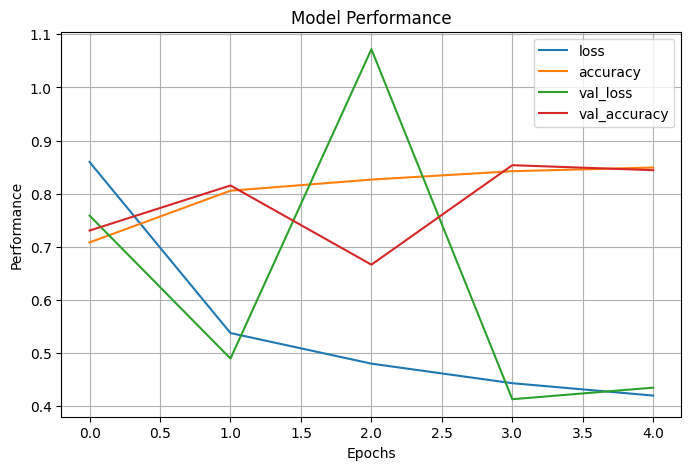

In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])
model_fit= model.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_validate,y_validate))

pd.DataFrame(model_fit.history).plot(figsize=(8,5))
py.title("Model Performance")
py.xlabel('Epochs')
py.ylabel('Performance')
py.grid(True)
py.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.4729 - accuracy: 0.8307
Model Evaluation score [0.4728500545024872, 0.8306999802589417]
313/313 [==============================] - 1s 2ms/step
y_pred output : [7 2 1 ... 8 1 5]
Predicted class : [7 2 1]
Perdicted class in labels : ['Sneaker' 'Pullover' 'Trouser']


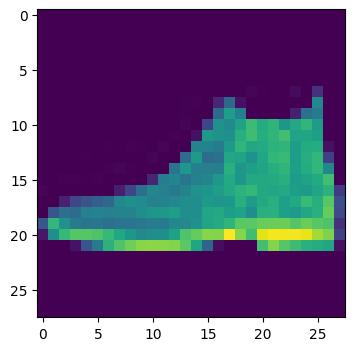

Confusion matrix :
 [[693   0   8 139   6   3 136   0  15   0]
 [  0 943   0  49   4   0   3   0   1   0]
 [  9   1 686  27 152   1 115   1   8   0]
 [  4   7   1 946  11   0  26   0   5   0]
 [  0   2  62  71 765   1  94   0   5   0]
 [  0   0   0   1   0 934   0  58   1   6]
 [ 99   2  77 111  77   0 608   0  26   0]
 [  0   0   0   0   0  27   0 970   0   3]
 [  1   1   7  13   2   3  11   7 955   0]
 [  0   0   0   0   0  28   0 164   1 807]]
Accuracy score : 0.8307


In [16]:
#Model evaluation
score=model.evaluate(x_test,y_test_sp)
print("Model Evaluation score",score)

#prediction & class output
y_pred=np.argmax(model.predict(x_test),axis=1)
print("y_pred output :",y_pred)

#class & label
print('Predicted class :',y_pred[:3])
print('Perdicted class in labels :',np.array(item_names)[y_pred[:3]])

py.figure(figsize=(6,4))
py.imshow(x_test[0].reshape((28,28)))
py.show()

print('Confusion matrix :\n',confusion_matrix(y_test_sp,y_pred))

print('Accuracy score :',accuracy_score(y_test_sp,y_pred))